## Statiksimulation

### mit Hilfe eines Federmodels

Diese Simulation nutzt das Prinzip, dass in einem Gleichgewicht die 
totale Energie des Systems minimal ist. In diesem Beispiel werden als wirkende Kräfte
die Gravitation und die Federkräfte zwischen den Massenpunkten verwendet.

### Aufgaben - Tasks
- Führen Sie die folgenden Python Programm Blöcke aus (CTRL + Enter oder Cell / Run All).
- Welchen Parameter müssen Sie ändern, damit die Konstruktion doppelt so gross wird?
- Untersuchen Sie die Wirkung der folgenden Parameter:
    - g
    - m
    - k
- Erstellen Sie eine eigene Konstruktion. Welche Variable beinhaltet die Koordinaten der Massen? Wie müsste das Programm angepasst werden? (grosse Herausforderung)


In [1]:
# Verwendete Bibliotheken
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Parameter
g = 9.81  # gravity of Earth
m = .1  # mass, in kg
n = 20  # number of masses
e = .1  # initial distance between the masses
l = e  # relaxed length of the springs
k = 30000  # spring stiffness

In [3]:
P0 = np.zeros((n, 2))
P0[:,0] = np.repeat(e*np.arange(n//2), 2)
P0[:,1] = np.tile((0,-e), n//2)

In [4]:
A = np.eye(n, n, 1) + np.eye(n, n, 2)


In [5]:
L = l * (np.eye(n, n, 1) + np.eye(n, n, 2))
for i in range(n//2-1):
    L[2*i+1,2*i+2] *= np.sqrt(2)

In [6]:
I, J = np.nonzero(A)


In [7]:
# Berechnung des Abstands für spez. Datenstruktur
dist = lambda P: np.sqrt((P[:,0]-P[:,0][:, np.newaxis])**2 + 
                         (P[:,1]-P[:,1][:, np.newaxis])**2)

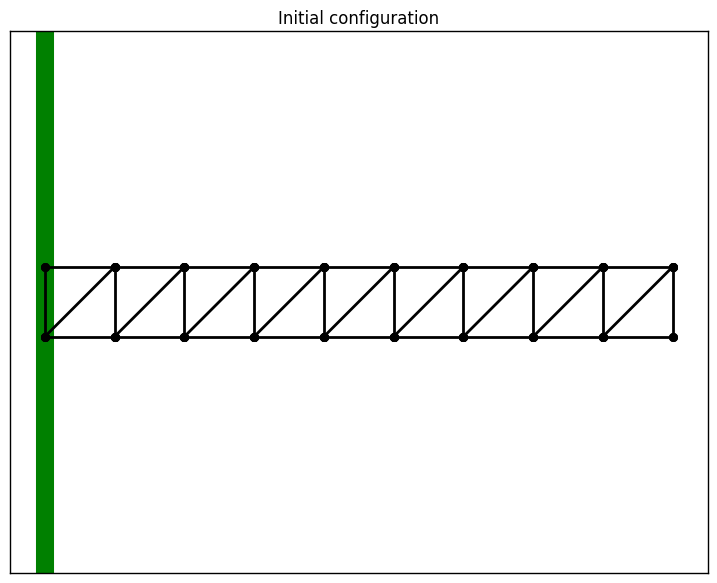

In [8]:
def show_bar(P):
    plt.figure(figsize=(9,7));
    # Wall.
    plt.axvline(0, color='g', lw=13);
    # Distance matrix.
    D = dist(P)
    # We plot the springs.
    for i, j in zip(I, J):
        # The color depends on the spring tension, which
        # is proportional to the spring elongation.
        c = D[i,j] - L[i,j]
        plt.plot(P[[i,j],0], P[[i,j],1], 
                 lw=2, color=plt.cm.copper(c*150));
    # We plot the masses.
    plt.plot(P[[I,J],0], P[[I,J],1], 'ok',);
    # We configure the axes.
    plt.axis('equal');
    plt.xlim(P[:,0].min()-e/2, P[:,0].max()+e/2);
    plt.ylim(P[:,1].min()-e/2, P[:,1].max()+e/2);
    plt.xticks([]); plt.yticks([]);

show_bar(P0);
plt.title("Initial configuration");

In [9]:
def energy(P):
    # The argument P is a vector (flattened matrix).
    # We convert it to a matrix here.
    P = P.reshape((-1, 2))
    # We compute the distance matrix.
    D = dist(P)
    # The potential energy is the sum of the
    # gravitational and elastic potential energies.
    return (g * m * P[:,1].sum() + 
            .5 * (k * A * (D - L)**2).sum())

In [10]:
energy(P0.ravel())

-0.98100000000000009

In [11]:
bounds = np.c_[P0[:2,:].ravel(), P0[:2,:].ravel()].tolist() + \
         [[None, None]] * (2*(n-2))
P1 = opt.minimize(energy, P0.ravel(),
                  method='L-BFGS-B',
                  bounds=bounds).x.reshape((-1, 2))

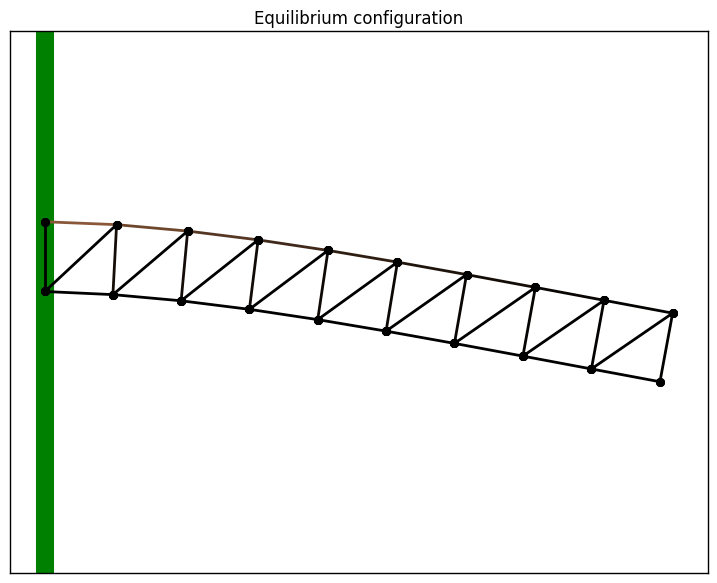

In [12]:
show_bar(P1);
plt.title("Equilibrium configuration");